In [1]:
from pylab import *
from scipy.linalg import lstsq
from scipy.special import jn

##### Constants

In [2]:
N = 101  # no of data points
K = 9    # no of sets of data with varying noise

A_true, B_true = 1.05, -0.105 # true values of A and B

### 1. Generate the data points

In [3]:
""" run generate_data.py to generate the data """

' run generate_data.py to generate the data '

### 2. Load data

In [4]:
raw_data = loadtxt('fitting.dat')

Time = raw_data[:, 0]
F = raw_data[:, 1:]

### 3. & 4. Plot the data along with true values

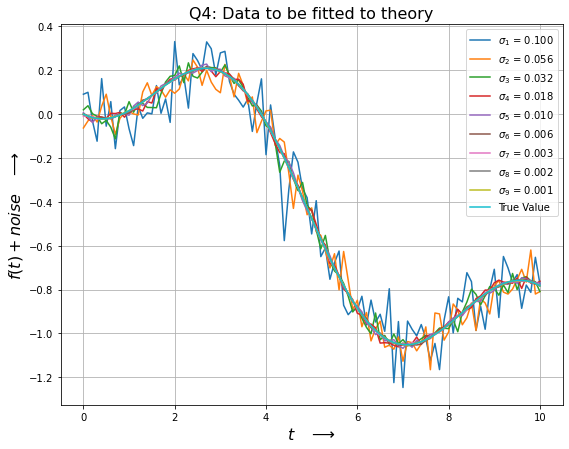

In [5]:
def g(t, A=A_true, B=B_true):
    return A * jn(2, t) + B * t


F_true = g(Time)
Sigma = logspace(-1, -3, K)  # vector of stdevs of noise

figure(figsize=(9, 7))
grid(True)
title("Q4: Data to be fitted to theory", size=16)
xlabel("$t$   $\longrightarrow$", size=16)
ylabel("$f(t)+noise$   $\longrightarrow$", size=16)
plot(Time, F)
plot(Time, F_true)
legend([f"$\sigma_{i + 1}$ = {s:.3f}" for i, s in enumerate(Sigma)] + ["True Value"])
show()


### 5. Plot the first column with error bars

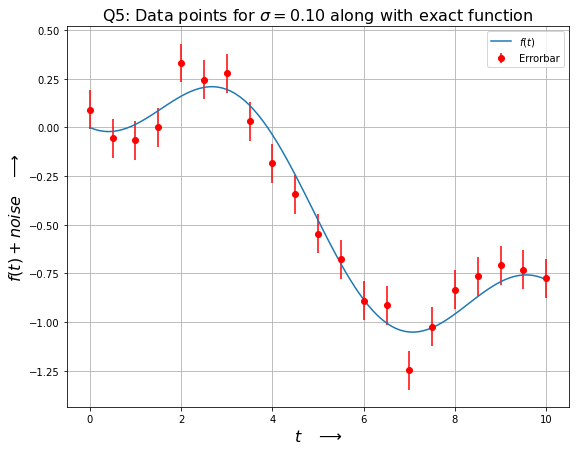

In [6]:
figure(figsize=(9, 7))
grid(True)
title("Q5: Data points for $\sigma = 0.10$ along with exact function", size=16)
xlabel("$t$   $\longrightarrow$", size=16)
ylabel("$f(t)+noise$   $\longrightarrow$", size=16)
errorbar(Time[::5], F[::5, 0], Sigma[0], fmt="ro")
plot(Time, F_true)
legend(["$f(t)$", "Errorbar"])
show()

### 6. Confirm that the two vectors are equal

In [7]:
M = c_[apply_along_axis(lambda t: jn(2, t), 0, Time), Time]
assert allclose(g(Time).reshape(N, 1), matmul(M, array([[A_true], [B_true]])))

### 7. Mean Squared Error for various A and B

In [13]:
# 0 to 2 in steps of 0.1 (including endpoint)
numA = int((2 - 0) / 0.1) + 1
A = linspace(0, 2, numA)

# -0.2 to 0 in steps of 0.01 (including endpoint)
numB = int((0 - -0.2) / 0.01) + 1
B = linspace(-0.2, 0, numB)

eps = zeros((numA, numB))
for i in range(numA):
    for j in range(numB):
        eps[i][j] = mean((F[:, 0] - g(Time, A[i], B[j])) ** 2, axis=0)

21 21


### 8. Plot the MSE

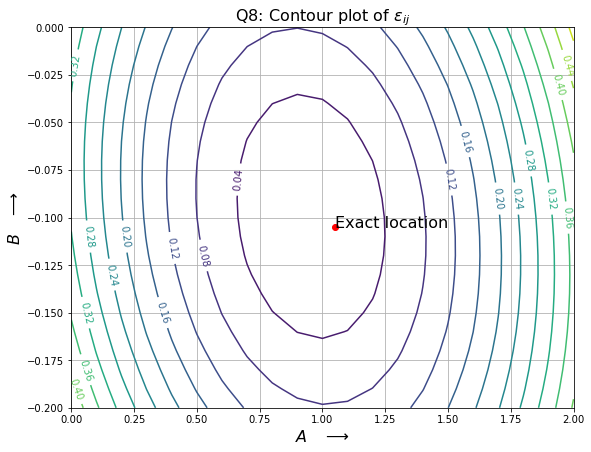

In [19]:
figure(figsize=(9, 7))
title("Q8: Contour plot of $\epsilon_{ij}$", size=16)
xlabel("$A$   $\longrightarrow$", size=16)
ylabel("$B$   $\longrightarrow$", size=16)
grid(True)
clabel(contour(A, B, eps, 15))
plot([A_true], [B_true], "ro")
annotate("Exact location", xy=(A_true, B_true), size=16)
show()

### 9. Obtain best estimate of A and B

In [10]:
print("Best estimate:   A = {}, B = {}".format(*lstsq(M, F[:, 0])[0]))

Best estimate:   A = 1.0063109760716045, B = -0.10452171507379829


### 10. Plot the error in A and B for different stdev of noise

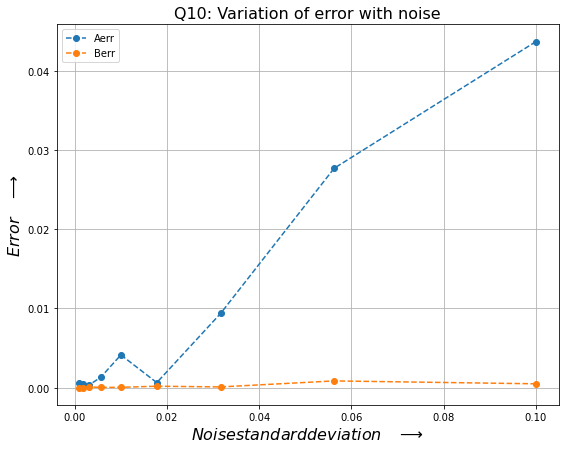

In [11]:
error_AB = abs(lstsq(M, F)[0] - array([[A_true], [B_true]]))

figure(figsize=(9, 7))
title("Q10: Variation of error with noise", size=16)
xlabel("$Noise standard deviation$   $\longrightarrow$", size=16)
ylabel("$Error$   $\longrightarrow$", size=16)
grid(True)
plot(Sigma, error_AB[0], 'o', linestyle="dashed")
plot(Sigma, error_AB[1], 'o', linestyle="dashed")
legend(["Aerr", "Berr"])
show()

### 11. Replot using log-log scale

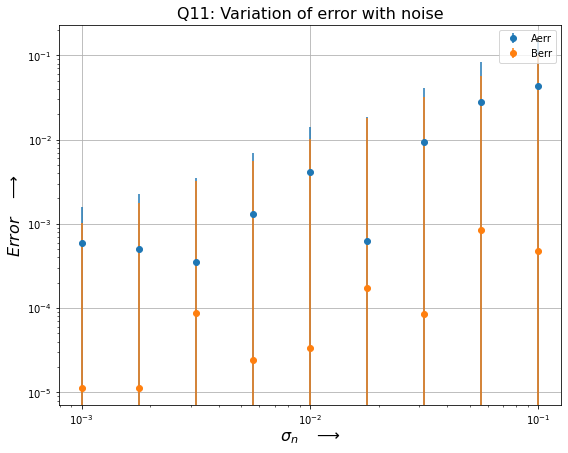

In [12]:
figure(figsize=(9, 7))
title("Q11: Variation of error with noise", size=16)
xlabel("$\sigma_n$   $\longrightarrow$", size=16)
ylabel("$Error$   $\longrightarrow$", size=16)
xscale("log")
yscale("log")
grid(True)
errorbar(Sigma, error_AB[0], Sigma, fmt="o")
errorbar(Sigma, error_AB[1], Sigma, fmt="o")
legend(["Aerr", "Berr"])
show()